In [55]:
#The goal of this program is to simulate the scheduling process for a patients going through the first part
#of a bone marrow transplant patient. I will use a greedy approach.
#The algorithm schedules a patient for the first available time slot for the
#first appointment, then schedules them for the first available time slot fot the second appointment.
#then we will see what happens

import numpy as np
import random
import matplotlib.pyplot as plt 

#define the max space in each facility.
sp1 = 12
sp2 = 3


#set the number of patients we want to schedule
num_pats = 100

#set the number of collections each patient needs.  ith spot corresponds to the ith patient.

coll = []
for i in range(num_pats):
    coll.append(3)

#number of days for chemo for each patient. ith spot corresponds to the ith patient.
chemo = []
for i in range(num_pats):
    chemo.append(2)

#number of days for infusion for each patient. ith spot corresponds to the ith patient.   
inf = []
for i in range(num_pats):
    inf.append(2)


#Makes a d1 schedule which places a patient in the first available day slot.
#Output is a list.  ith position tells you the day patient i is scheduled for the d1 procedure.  
#Day 0 is a Monday, and we ignore weekends when scheduling.
def make_schedule_d1(num_patients, max_space1):
    #initialize schedules for d1 and d2 procedures.  These record the number of patients scheduled for each procedure on each day.
    space1 = np.zeros(150)
    #space2 = np.zeros(100)
    
    n1=len(space1)
    #n2=len(space2)
    
    #initialize a vector which will keep track of each patient's schedule for 
    #d1.
    patients_d1 = []
    #patients_d2 = []
    for i in range(num_patients):
        for j in range(n1):
            #for each patient, we will schedule them in the first available
            #time slot for the d1 procedure.
            if space1[j]< max_space1: #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 1 is )
                space1[j]=space1[j]+1 #add patient i to the schedule on day j
                patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
                break
           
    return(np.array(patients_d1))


first_sched = make_schedule_d1(num_pats, sp1)
    
first_sched              
                    
        

                
                
                


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8])

In [57]:
#Let's create a function that will create a d2 schedule given a d1 schedule, the number of collections they need,
#and the max amount of space available in the d2 facility.
#d1_schedule is a list of length n, same size list as collections.  Output is a list of numbers.  The max space is the
#number of spaces which the facility has, and a patient goes through the facility in an hour.
def make_schedule_d2(d1_schedule, collections, max_space2):
    space2 = np.zeros(150) #the length of this list is the max number of days 
    patients2=[] #Initiate a patient list
    for j, day in enumerate(d1_schedule):
        if space2[day+collections[j]]<8*max_space2:
            space2[day+collections[j]]=space2[day+collections[j]]+1
            patients2.append(day+collections[j])
    return(np.array(patients2))

second_sched = make_schedule_d2(first_sched, coll, sp2)
#second_sched

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11])

In [59]:
#Given a d2 schedule, the number of days each patient needs for chemo, and , make a function that will tell you how many patients are in the hospital (different from the d1
#and d2 facility) on any given day.  
#Some variables to consider: number of days for chemo for each patient, number of days for infusion for each patient.

def make_schedule_hospital(d2_schedule, chemo_list, infusion_list):
    chemo_space = np.zeros(150)
    infusion_space = np.zeros(150)
    for i,day in enumerate(d2_schedule):
        for j in range(chemo_list[i]):
            chemo_space[day+j]=chemo_space[day+j]+1
            
        for k in range(infusion_list[i]):
            infusion_space[day+chemo_list[i]+k+1] = infusion_space[day+chemo_list[i]+k+1]+1
    
    return(chemo_space+infusion_space) #The ith position will give the number of people in the hospital on day i.
        
hosp_sched = make_schedule_hospital(second_sched,chemo,inf)           
            
        

Text(0,0.5,'Patients in System')

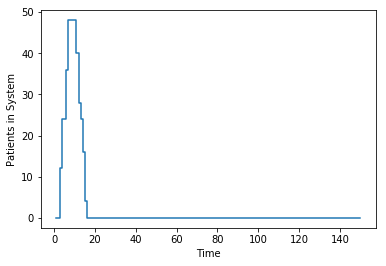

In [60]:
#Now let's plot the patient influx
NumDays = len(hosp_sched)+1
Nd=list(range(1,NumDays))
plt.step(Nd, hosp_sched)
plt.xlabel("Time")
plt.ylabel("Patients in Hospital")

In [61]:
#Incorporating patients coming in batches week-by-week. This will do the exact same thing as make_schedule_d1, but it
#will take in a list with the number of patients coming in each week.
num_pat_list = []
for i in range(10):
    num_pat_list.append(20)
sp1=12
sp2=3

num_pats=sum(num_pat_list)
coll = []
for i in range(num_pats):
    coll.append(3)
    
chemo = []
for i in range(num_pats):
    chemo.append(2)

inf = []
for i in range(num_pats):
    inf.append(2)
def make_schedule_d1_batch(num_patients_list, max_space1):
    space1 = np.zeros(150)
    #space2 = np.zeros(100)
    
    n1=len(space1)
    #n2=len(space2)
    
    #initialize a vector which will keep track of each patient's date for the start of the d1 procedure
    #d1
    patients_d1 = []
    #patients_d2 = []
    for i,num_patients in enumerate(num_patients_list):
        for k in range(num_patients):
            for j in range(5*i,n1):
                #for each patient, we will schedule them in the first available
                #time slot for the d1 procedure.  We take into account the week that they arrive
                if space1[j]< max_space1: #if there is space in the d1 facility on day j (interpret weeks as 5 days long, 0 is Monday)
                    space1[j]=space1[j]+1 #add patient i to the schedule on day j
                    patients_d1.append(j) #record the fact that patient i was scheduled for d1 on day j
                    break
           
    return(patients_d1)

batch_sched_d1 = make_schedule_d1_batch(num_pat_list, sp1)
print(batch_sched_d1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46]


Text(0,0.5,'Patients in System')

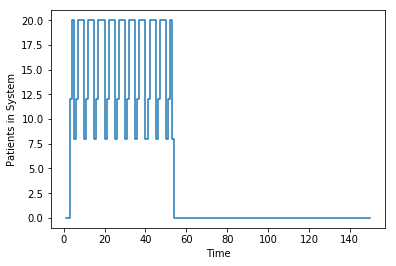

In [62]:
batch_sched_d2= make_schedule_d2(batch_sched_d1, coll, sp2)

batch_hosp_sched = make_schedule_hospital(batch_sched_d2,chemo,inf)  

#Now let's plot the patient influx
NumDays = len(batch_hosp_sched)+1
Nd=list(range(1,NumDays))
plt.step(Nd, batch_hosp_sched)
plt.xlabel("Time")
plt.ylabel("Patients in Hospital")